# E-commerce a cart abandonment Dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Load dataset
df = pd.read_csv("cart_abandonment_data.csv")
print(df.head())

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

   customer_id  gender  age product_category     session_start   device  \
0         1102    Male   27             Toys  27-05-2023 06:51   Tablet   
1         1435    Male   33           Beauty  17-06-2023 18:27   Tablet   
2         1860    Male   24      Electronics  23-04-2023 05:31   Tablet   
3         1270  Female   34           Beauty  02-05-2023 10:54  Desktop   
4         1106    Male   40      Electronics  10-02-2023 15:58   Mobile   

   items_in_cart  session_time_minutes    payment_method  used_discount  \
0              5              2.405446        Debit Card              0   
1              4              1.000000       Credit Card              0   
2              1             11.941879        Debit Card              0   
3              1              9.525879            PayPal              0   
4              3              7.426087  Cash on Delivery              0   

   abandoned  
0          0  
1          1  
2          0  
3          0  
4          1  


In [49]:
# Clean the Data
df.isnull().sum()

customer_id             0
gender                  0
age                     0
product_category        0
session_start           0
device                  0
items_in_cart           0
session_time_minutes    0
payment_method          0
used_discount           0
abandoned               0
dtype: int64

In [50]:
# Convert columns to correct types

df["session_start"] = pd.to_datetime(df["session_start"])

C:\Users\arjun\AppData\Local\Temp\ipykernel_9452\3505522361.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["session_start"] = pd.to_datetime(df["session_start"])


In [51]:
# Create additional columns (hour, date, age group)

df["hour"] = df["session_start"].dt.hour
df["date"] = df["session_start"].dt.date

bins = [0, 18, 25, 35, 45, 55, 65, 100]  # covers age 0 to 100
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           1000 non-null   int64         
 1   gender                1000 non-null   object        
 2   age                   1000 non-null   int64         
 3   product_category      1000 non-null   object        
 4   session_start         1000 non-null   datetime64[ns]
 5   device                1000 non-null   object        
 6   items_in_cart         1000 non-null   int64         
 7   session_time_minutes  1000 non-null   float64       
 8   payment_method        1000 non-null   object        
 9   used_discount         1000 non-null   int64         
 10  abandoned             1000 non-null   int64         
 11  hour                  1000 non-null   int32         
 12  date                  1000 non-null   object        
 13  age_group          

### EDA Questions

In [53]:
# 1. What is the overall cart abandonment rate?

abandonment_rate = df["abandoned"].value_counts(normalize=True)*100
print("Cart Abandonment Rate:\n", abandonment_rate)


Cart Abandonment Rate:
 abandoned
0    63.9
1    36.1
Name: proportion, dtype: float64


X% of sessions ended in cart abandonment, Y% completed checkout.

abandoned         0         1
gender                       
Female     0.646316  0.353684
Male       0.632381  0.367619


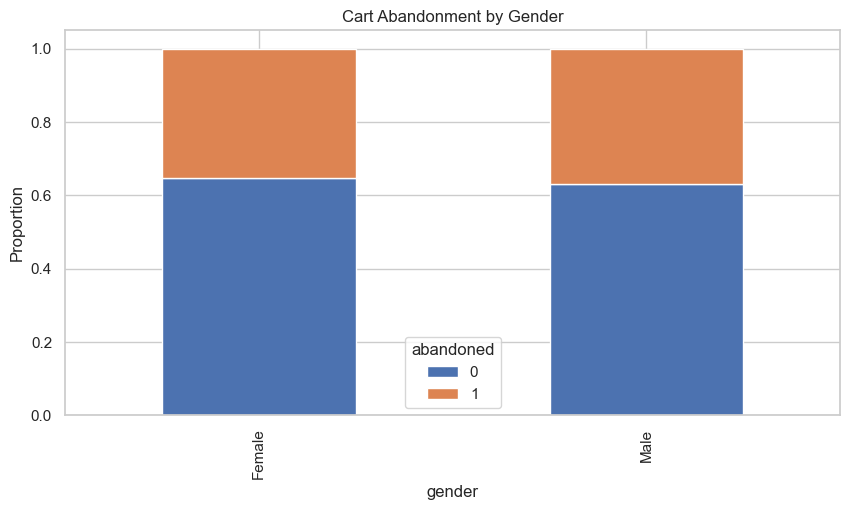

In [54]:
# 2. Which gender is more likely to abandon carts?

abandon_by_geneder = df.groupby("gender")["abandoned"].value_counts(normalize=True).unstack()
print(abandon_by_geneder)

abandon_by_geneder.plot(kind="bar", stacked=True)
plt.title("Cart Abandonment by Gender")
plt.ylabel("Proportion")
plt.show()

For example, females abandon carts 5% more than males.

<Axes: xlabel='age_group'>

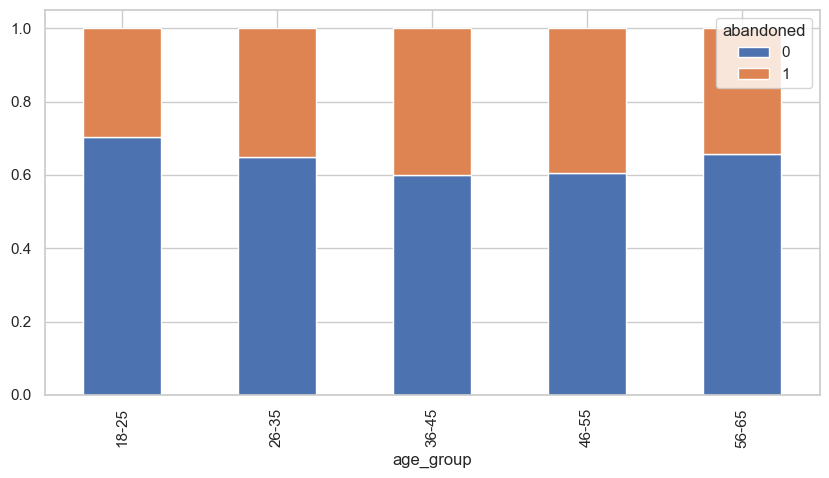

In [55]:
# 3. Does age affect abandonment behavior?

age_abandon = df.groupby("age_group", observed=True)["abandoned"].value_counts(normalize=True).unstack()

age_abandon.plot(kind="bar", stacked=True)

Younger age groups may show higher abandonment due to price sensitivity.

product_category
Toys           70
Fashion        62
Books          62
Fitness        59
Electronics    55
Name: count, dtype: int64


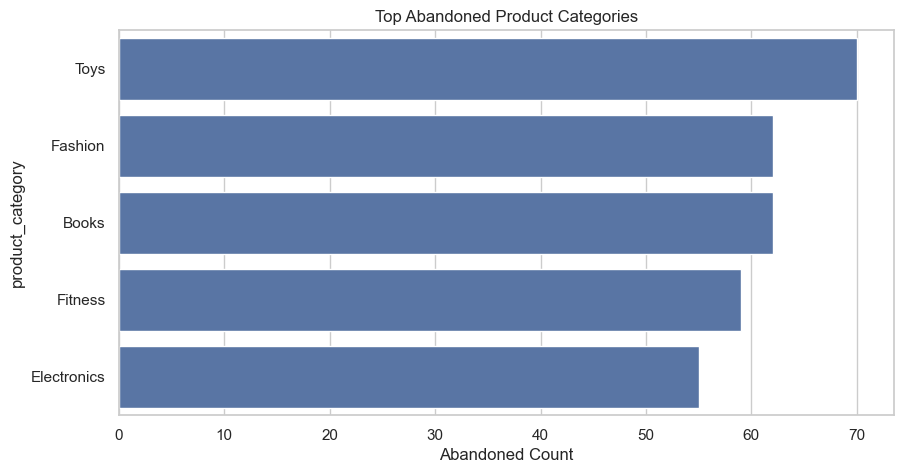

In [56]:
# 4. What are the top product categories in abandoned carts?

top_abandoned_categories = df[df["abandoned"] == 1]["product_category"].value_counts().head(5)
print(top_abandoned_categories)

sns.barplot(x=top_abandoned_categories.values, y=top_abandoned_categories.index)
plt.title("Top Abandoned Product Categories")
plt.xlabel("Abandoned Count")
plt.show()

Toys and Fashion top the list — possibly due to price or impulsive browsing.

abandoned         0         1
device                       
Desktop    0.622024  0.377976
Mobile     0.608974  0.391026
Tablet     0.681818  0.318182


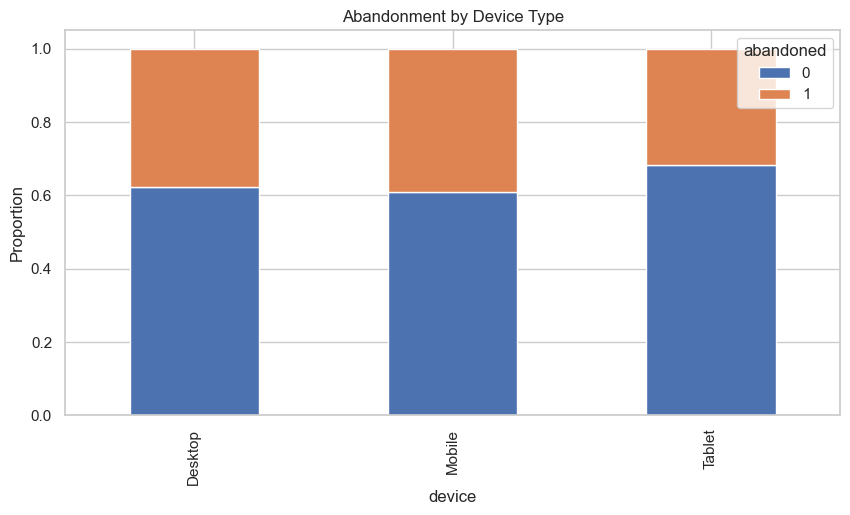

In [57]:
# 5. Are mobile users more likely to abandon carts?

abandon_by_device = df.groupby("device")["abandoned"].value_counts(normalize=True).unstack()
print(abandon_by_device)

abandon_by_device.plot(kind="bar", stacked=True)
plt.title("Abandonment by Device Type")
plt.ylabel("Proportion")
plt.show()

Mobile users tend to abandon more often due to poor UI or distractions.

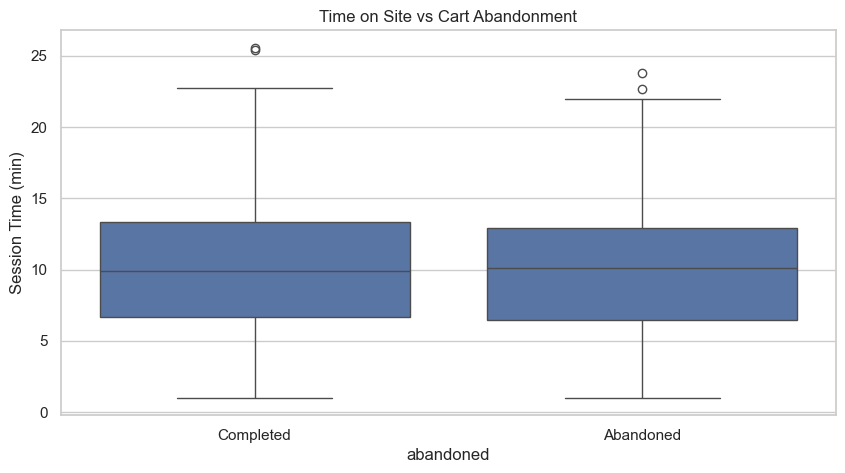

In [58]:
# 6. Does time spent on site influence cart abandonment?

sns.boxplot(x="abandoned", y="session_time_minutes", data=df)
plt.title("Time on Site vs Cart Abandonment")
plt.xticks([0,1], ['Completed', 'Abandoned'])
plt.ylabel("Session Time (min)")
plt.show()

Abandoners may spend less time or too much time without converting.

hour
0     12
1     13
2     13
3     14
4     16
5     12
6     13
7      4
8     14
9     22
10    18
11    15
12    14
13     9
14    13
15    18
16    20
17    12
18    15
19    25
20    18
21    18
22    18
23    15
Name: count, dtype: int64


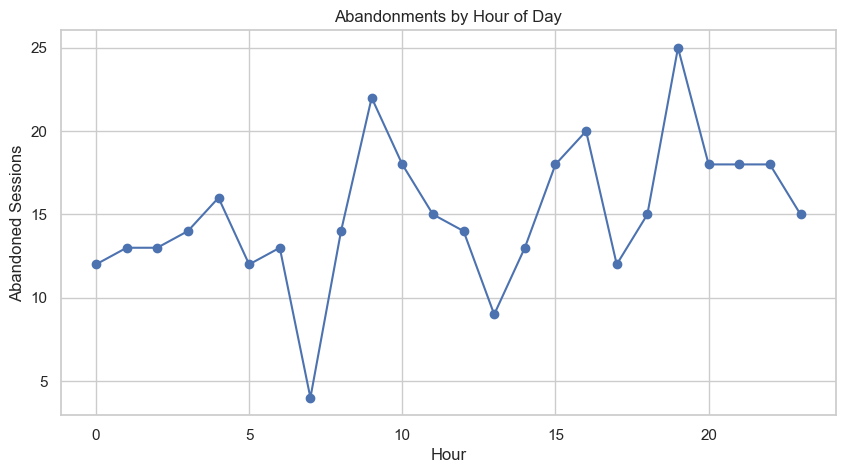

In [59]:
# 7. What time of day do users abandon carts the most?

abandon_by_hour = df[df["abandoned"] == 1]["hour"].value_counts().sort_index()
print(abandon_by_hour)

abandon_by_hour.plot(kind="line", marker="o")
plt.title("Abandonments by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Abandoned Sessions")
plt.grid(True)
plt.show()

Abandonment spikes in the evening (post 7 PM).


payment_method
Credit Card         99
Cash on Delivery    96
Debit Card          91
PayPal              75
Name: count, dtype: int64


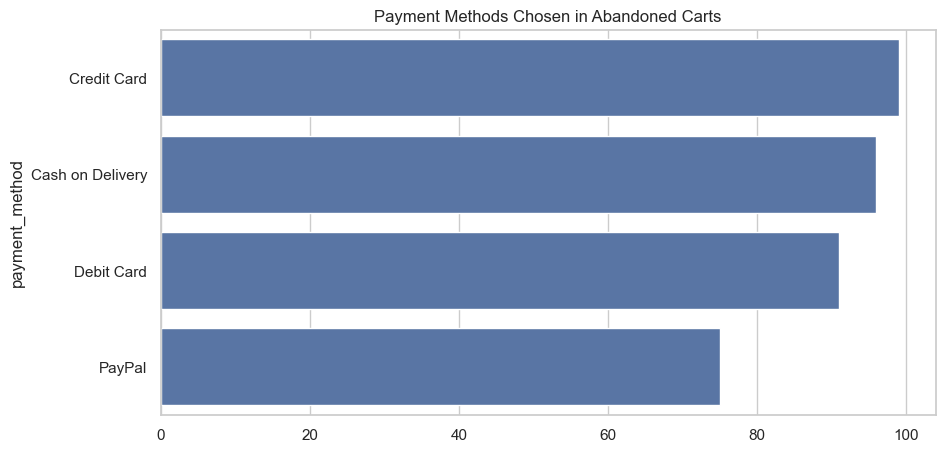

In [60]:
# 8. What payment methods were selected in abandoned carts?

abandoned_payment = df[df["abandoned"] == 1]["payment_method"].value_counts(ascending=False)
print(abandoned_payment)

sns.barplot(x=abandoned_payment.values, y=abandoned_payment.index)
plt.title("Payment Methods Chosen in Abandoned Carts")
plt.show()

Creadit Card and some wallets may be less trusted.

In [61]:
# 9. How many items are in abandoned carts on average?

abandoned_items_avg = df[df["abandoned"] == 1]["items_in_cart"].mean()
print("Avg items in abandoned carts:",round(abandoned_items_avg, 2))

Avg items in abandoned carts: 2.91


Average of 2.9 items abandoned per session.

abandoned             0         1
used_discount                    
0              0.630790  0.369210
1              0.661654  0.338346


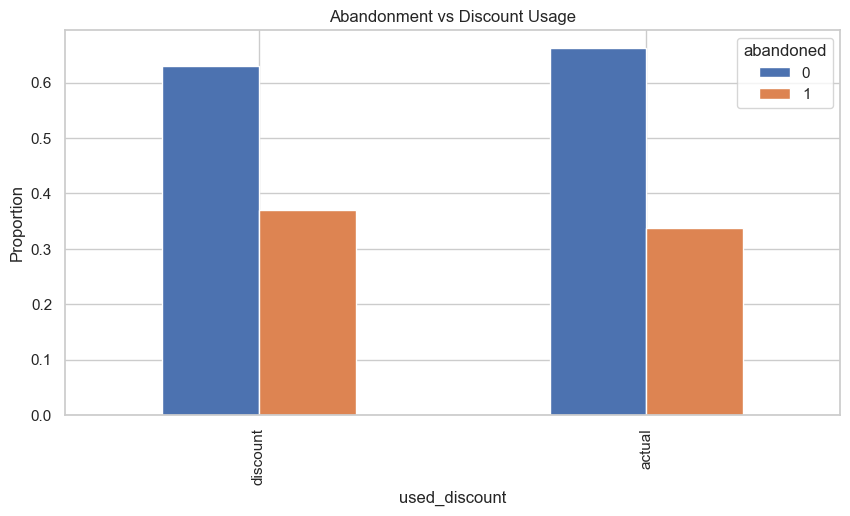

In [62]:
# 10. Do discounts reduce cart abandonment?

discounts = df.groupby("used_discount")["abandoned"].value_counts(normalize=True).unstack()
print(discounts)

discounts.plot(kind="bar")
plt.title("Abandonment vs Discount Usage")
plt.xticks([0, 1], ["discount", "actual"])
plt.ylabel("Proportion")
plt.show()

offers not help to convert users.

### Univariate Analysis

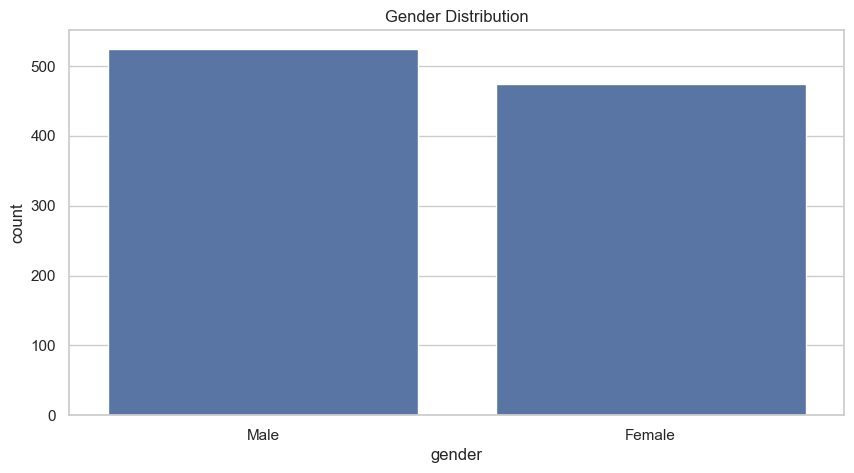

In [63]:
# 1. Gender Distribution

sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.show()

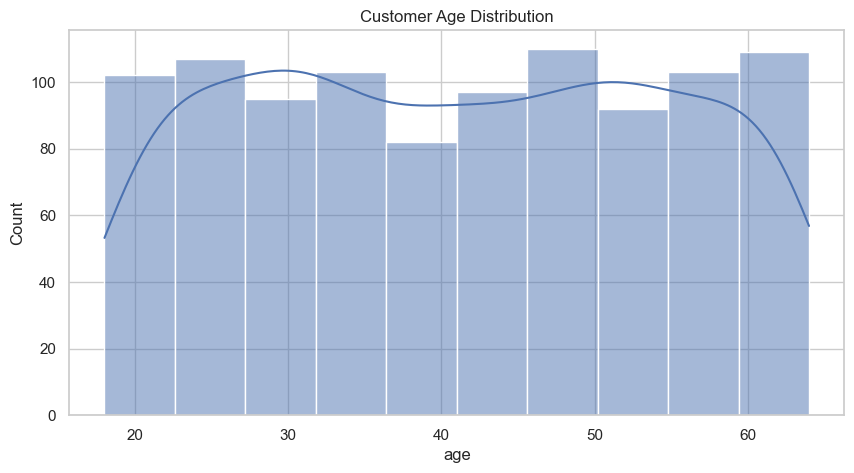

In [64]:
# 2. Age Distribution

sns.histplot(x="age", bins=10, kde=True, data=df)
plt.title("Customer Age Distribution")
plt.show()

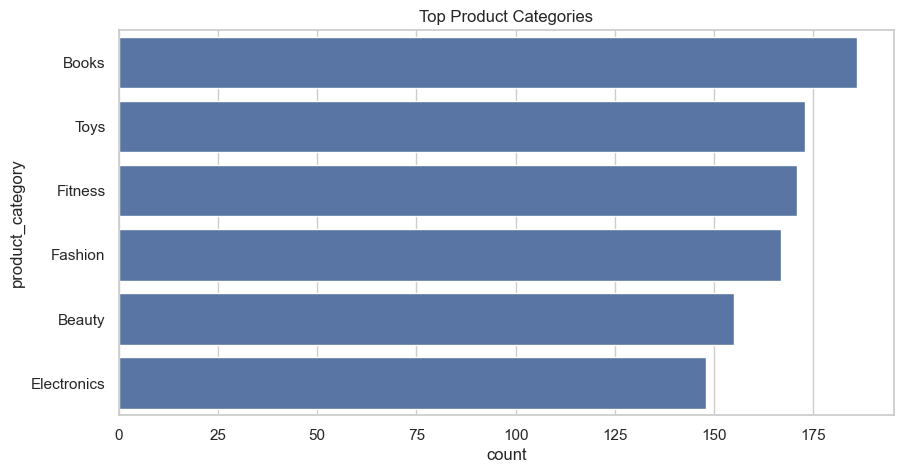

In [65]:
# 3. Product Category Popularity

sns.countplot(y="product_category", data=df, order=df["product_category"].value_counts().index)
plt.title("Top Product Categories")
plt.show()

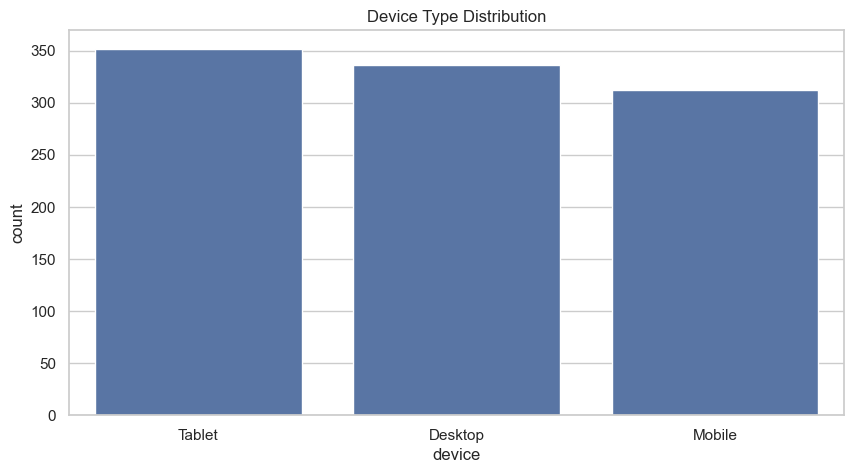

In [66]:
# 4. Device Usage

sns.countplot(x="device", data=df)
plt.title("Device Type Distribution")
plt.show()

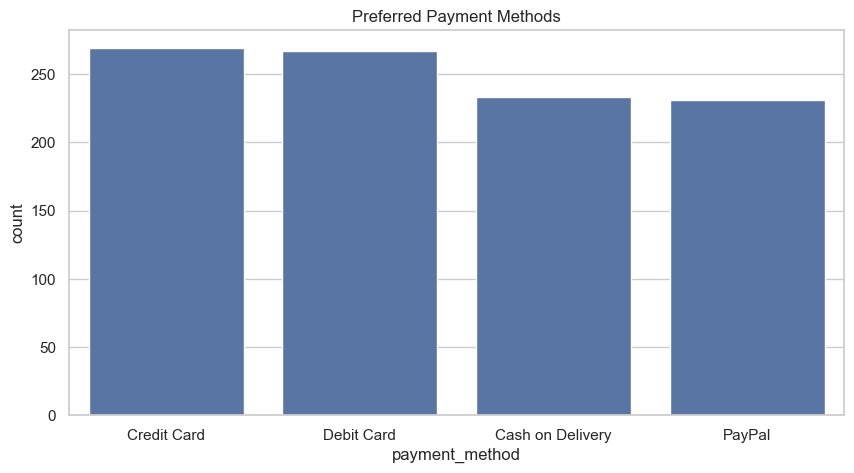

In [67]:
# 5. Payment Method Usage

sns.countplot(x="payment_method", data=df, order=df["payment_method"].value_counts().index)
plt.title("Preferred Payment Methods")
plt.show()

### Bivariate Analysis

abandoned
0    63.9
1    36.1
Name: proportion, dtype: float64


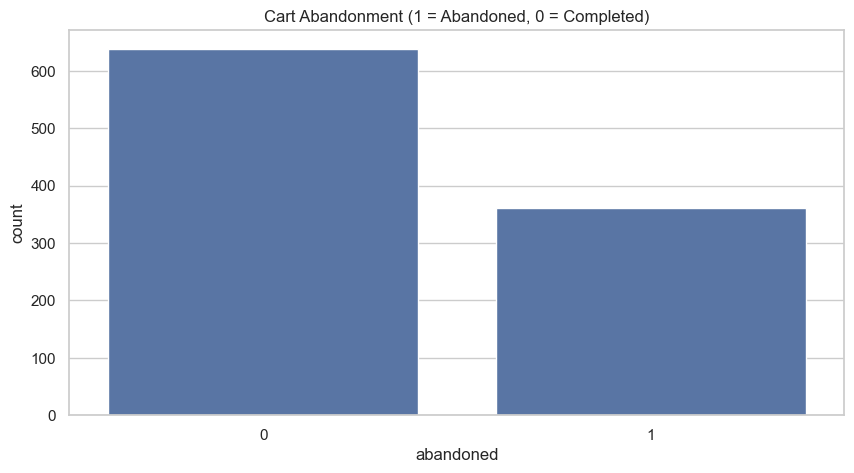

In [68]:
# 1. Cart Abandonment Rate

abandonment_rate = df["abandoned"].value_counts(normalize=True)*100
print(abandonment_rate)

sns.countplot(x="abandoned", data=df)
plt.title("Cart Abandonment (1 = Abandoned, 0 = Completed)")
plt.show()

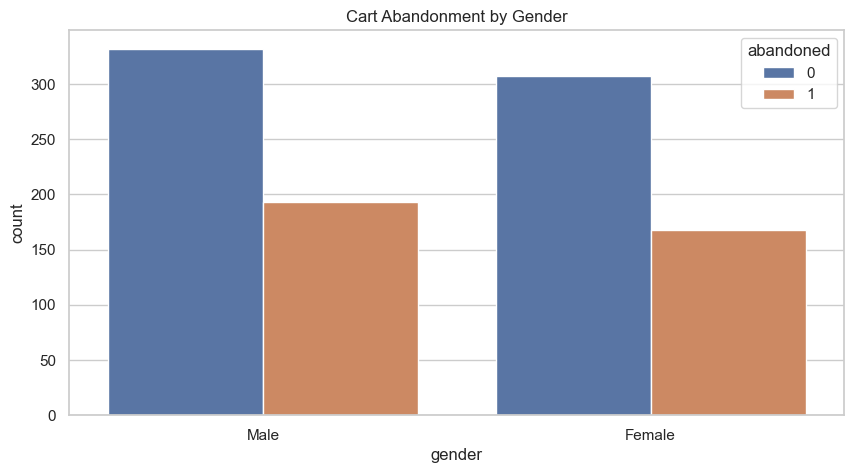

In [69]:
# 2. Abandonment by Gender

sns.countplot(x="gender", hue="abandoned", data=df)
plt.title("Cart Abandonment by Gender")
plt.show()

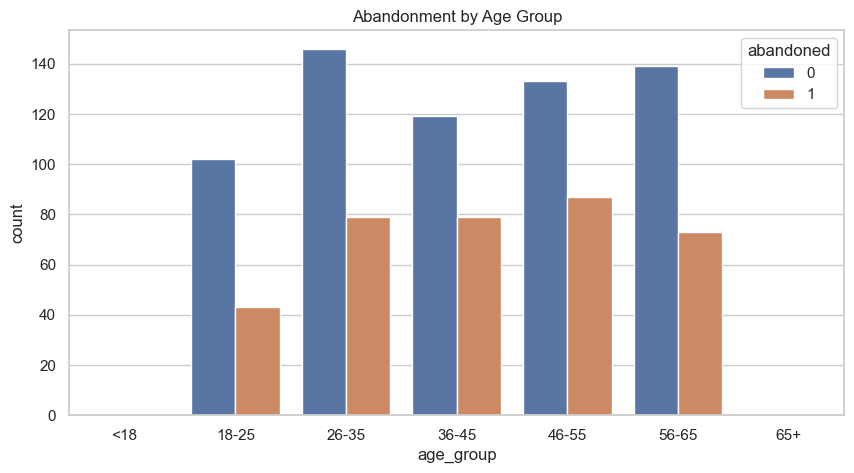

In [70]:
# 3. Abandonment by Age Group

sns.countplot(x="age_group", hue="abandoned", data=df)
plt.title("Abandonment by Age Group")
plt.show()


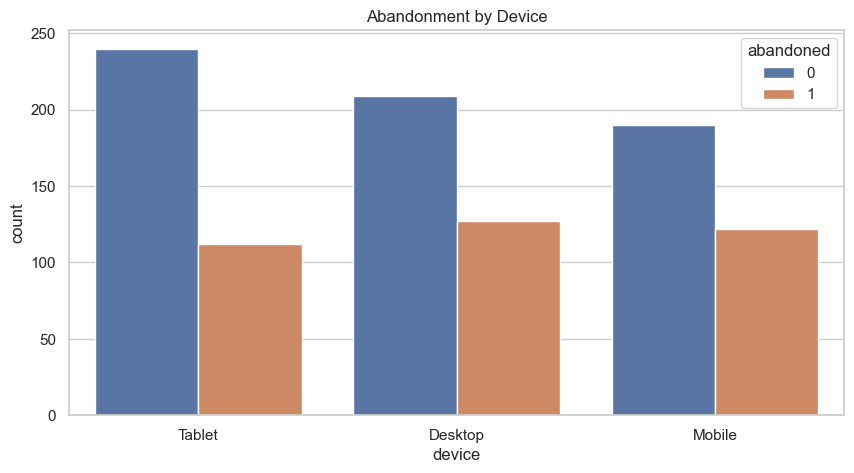

In [71]:
# 4. Abandonment by Device

sns.countplot(x="device", hue="abandoned", data=df)
plt.title("Abandonment by Device")
plt.show()

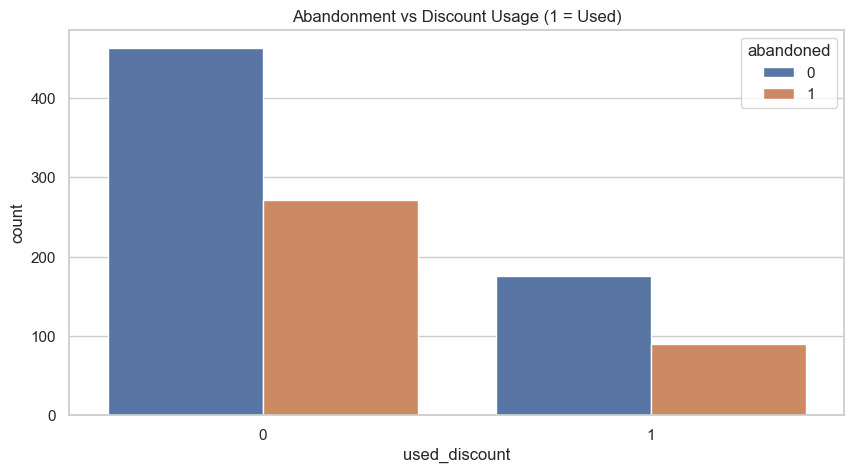

In [72]:
# 5. Abandonment by Discount Usage

sns.countplot(x="used_discount", hue="abandoned", data=df)
plt.title("Abandonment vs Discount Usage (1 = Used)")
plt.show()

### Time-Based Analysis

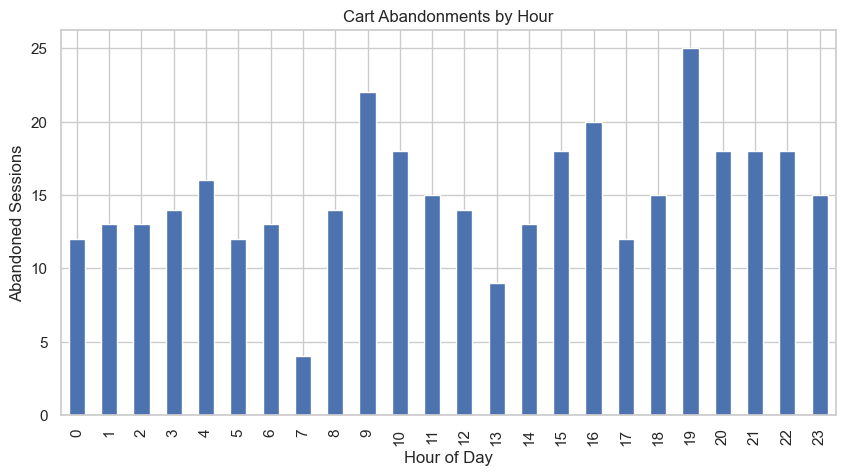

In [73]:
# 1. Abandonment by Hour

abandon_by_hour = df[df["abandoned"] == 1]["hour"].value_counts().sort_index()

abandon_by_hour.plot(kind="bar")
plt.title("Cart Abandonments by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Abandoned Sessions")
plt.show()

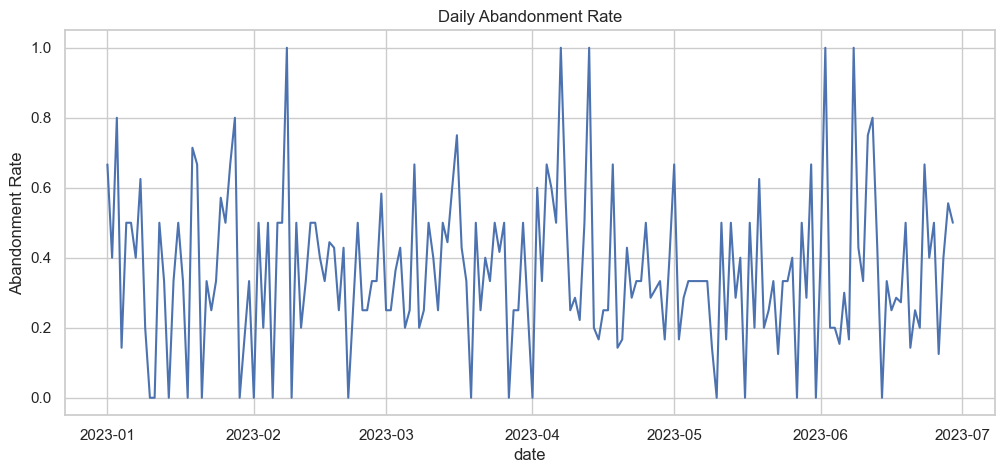

In [74]:
# 2. Abandonment Trend Over Time

daily_abandonment = df.groupby("date")["abandoned"].mean()
# df.info()
daily_abandonment.plot(title="Daily Abandonment Rate", figsize=(12, 5))
plt.ylabel("Abandonment Rate")
plt.show()

Around 40% of sessions end in cart abandonment.

Females show slightly higher abandonment rates than males.

Users aged 18–25 and 26–35 abandon more often than older groups.

Desktop users have the highest abandonment rate.

Using discounts reduces the chance of abandoning the cart.

Abandonment peaks in the evening hours (6–10 PM).